### Beta decay
in this experiment we examine two samples radiating beta rays and determine how these rays travel in a solid(aluminum in here)

maximum energy is 3.525 MeV.
maximum energy is 1.509 MeV.*2
1.7279251299893308


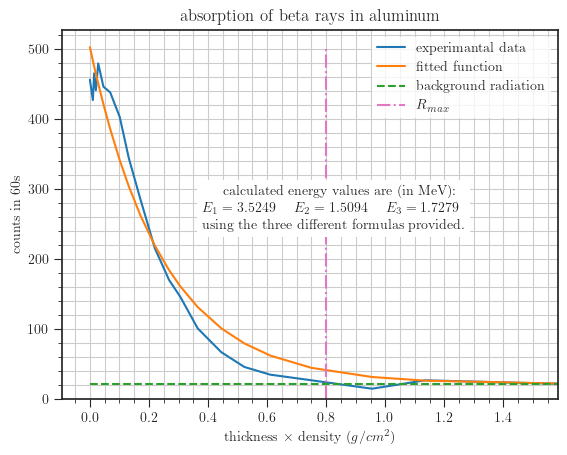

In [10]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def realize(count,dtime,stime):
    '''
    Realizer function that calculates the real counts for a Geiger-Muller counter with given deadtime.
    '''
    return count/(1-count*dtime/stime)


data = np.genfromtxt('exp4_data.csv',delimiter=',') # importing data files
dead_time = 2e-4
background_time = 300
sample_time = 60
global rho
rho = 2.71

counts = realize(data[1:,1],dead_time,sample_time)
thickness = data[1:,0]/1000
global background 
background = data[0,1]*sample_time/background_time

def fitfunc(x,I0,alpha):
    return I0*np.exp(-alpha*(x)) + background
    
#-beta*(np.abs(17/alpha))**(1/1.14)


params, cov = curve_fit(fitfunc,thickness,counts)

Emax = (np.abs(17/params[1]))**(1/1.14)

print(f'maximum energy is {Emax:.4} MeV.')

rmax = 0.8
Emax2 = rmax/0.530 
print(f'maximum energy is {Emax2:.4} MeV.*2')

Emax3 = np.exp((1.265-np.sqrt(1.265**2-4*0.0945*np.log(rmax/0.412)))/(2*0.0945))
print(Emax3)

plt.style.use(plt.style.available[25])
plt.rcParams['text.usetex'] = True
plt.plot(thickness,counts,label=r'\textrm{experimantal data}')
plt.plot(thickness,fitfunc(thickness,*params),label=r"\textrm{fitted function}")
plt.hlines(background,0,1.2*thickness.max(),"C2","--",label=r'\textrm{background radiation}')
plt.vlines(rmax,0,500,'C6','-.',label=r'$R_{max}$')

plt.title(r'\textrm{absorption of beta rays in aluminum}')
plt.xlabel(r'\textrm{thickness} $\times$ \textrm{density} $(g/cm^2)$')
plt.ylabel(r'\textrm{counts in 60s}')
plt.text(0.38,290,r'\textrm{calculated energy values are (in MeV):}\\ $E_1=%.4f$ \quad $E_2=%.4f$ \quad $E_3=%.4f$ \\ \textrm{using the three different formulas provided.}' % (Emax,Emax2,Emax3),
         bbox={'facecolor':'white','ec':'none'})
plt.ylim(bottom=0)
plt.xlim(right=thickness.max())
plt.minorticks_on()
plt.grid(True,which='both')
lg = plt.legend(frameon=True)
lg.get_frame().set_linewidth(0.0)
plt.savefig('exp4_plot.jpg',dpi=500)
plt.show()